# Part I - (Ford GoBike Dataset Exploration)
## by (Adewunmi Olowu)

## Introduction
> This document explores a dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

## Preliminary Wrangling


In [61]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [62]:
fordgobike=pd.read_csv('fordgobike-tripdata.csv')
print(fordgobike.shape)
print(fordgobike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


In [63]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [64]:
for col in ['start_time', 'end_time']:
    fordgobike[col] = fordgobike[col].astype('datetime64[ns]')

In [65]:
#Further breakdown Starttime & EndTime into day of week
fordgobike['start_dayofweek']=fordgobike['start_time'].dt.day_name()
fordgobike['end_dayofweek']=fordgobike['end_time'].dt.day_name()
fordgobike['start_hourofday']=fordgobike['start_time'].dt.hour
fordgobike['end_hourofday']=fordgobike['end_time'].dt.hour
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,Friday,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0


In [66]:
print (fordgobike['user_type'].unique())
print (fordgobike['member_gender'].unique())
print (fordgobike['bike_share_for_all_trip'].unique());

['Customer' 'Subscriber']
['Male' nan 'Other' 'Female']
['No' 'Yes']


In [67]:
fordgobike['member_gender'] = fordgobike['member_gender'].fillna('N/A')

In [68]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types
for col in ['user_type', 'member_gender', 'bike_share_for_all_trip']:
    fordgobike[col] = fordgobike[col].astype('category')

In [69]:
fordgobike['start_periodofday'] = (fordgobike['start_hourofday'] % 24 + 4) // 4
fordgobike['start_periodofday'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Afternoon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday,start_periodofday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8,Evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,N/A,No,Thursday,Friday,18,6,Evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4,Evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0,Night


In [70]:
#There is a need to code the values of bike_share_for_all_trip seeing it is a very important variable to the analysis and it is currently in text format
#Creates a new column 'bike_share_for_all_trip_code' [No] as 0 and [Yes] as 1
fordgobike['bike_share_for_all_trip_code'] = fordgobike['bike_share_for_all_trip'].cat.codes
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_dayofweek,end_dayofweek,start_hourofday,end_hourofday,start_periodofday,bike_share_for_all_trip_code
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,Friday,17,8,Evening,0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,N/A,No,Thursday,Friday,18,6,Evening,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,Friday,12,5,Afternoon,0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,Thursday,Friday,17,4,Evening,0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0,Night,1


In [71]:
#Conversion of 'start_periodofday' and 'start_dayofweek' to ordinal data type
period_classes=['Early Morning', 'Morning','Afternoon','Evening', 'Night', 'Late Night']
peclasses=pd.api.types.CategoricalDtype(ordered=True, categories=period_classes)
fordgobike['start_periodofday']=fordgobike['start_periodofday'].astype(peclasses)

In [72]:
day_classes=['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
daclasses=pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
fordgobike['start_dayofweek']=fordgobike['start_dayofweek'].astype(daclasses)

In [73]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec                    183412 non-null int64
start_time                      183412 non-null datetime64[ns]
end_time                        183412 non-null datetime64[ns]
start_station_id                183215 non-null float64
start_station_name              183215 non-null object
start_station_latitude          183412 non-null float64
start_station_longitude         183412 non-null float64
end_station_id                  183215 non-null float64
end_station_name                183215 non-null object
end_station_latitude            183412 non-null float64
end_station_longitude           183412 non-null float64
bike_id                         183412 non-null int64
user_type                       183412 non-null category
member_birth_year               175147 non-null float64
member_gender                   183412 non-null category
bike_share_for_all_trip         183412 

In [74]:
#finding duplicates
sum(fordgobike.duplicated())

0

### What is the structure of your dataset?

> There are 183,412 bike share data entries in the dataset with 16 variables, most of which are numeric in nature except for the variables- 'user_type', 'member_gender', 'bike_share_for_all_trip' which are categorical.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in understanding.
- When are most trips taken in terms of time of day, day of the week?
- What variables are mostly impacting on the average duration spent on a ride?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that variables: user_type, member_gender, start_dayofweek, start_periodofday, bike_share_for_all_trip will support my investigation

## Univariate Exploration
> First, we will take a look at the variable of interest- duration. We will look at its distribution. 

In [75]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hourofday,end_hourofday,bike_share_for_all_trip_code
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,13.458421,13.614769,0.094645
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,4.724978,4.739638,0.292725
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,0.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,9.000000,9.000000,0.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,14.000000,0.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,17.000000,18.000000,0.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,1.000000


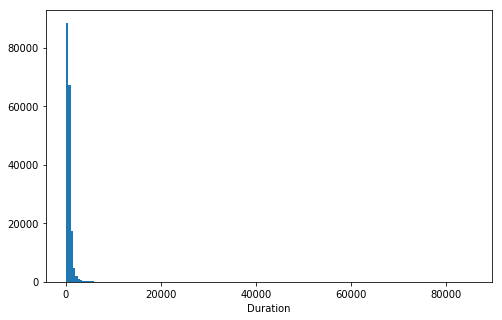

In [76]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, fordgobike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xlabel('Duration')
plt.show()

In [77]:
np.log10(fordgobike['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

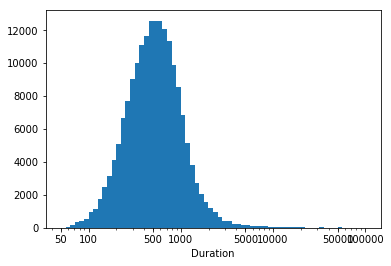

In [78]:
bins = 10 ** np.arange(1.7, 5+0.05, 0.05)
plt.hist(data = fordgobike, x = 'duration_sec', bins=bins)
plt.xscale('log')
ticks = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
plt.xticks(ticks, ticks)
plt.xlabel('Duration');



>Duration has a highly skewed distribution. When plotted on a log-scale, the distribution looks unimodal, with its peak between 500 and 1000

> Next up, the first predictor variable of interest: user_type.

In [79]:
# select low outliers, using criteria eyeballed from earlier plot

low_outliers = (fordgobike['duration_sec'] < 55) 
print(low_outliers.sum())
print(fordgobike.loc[low_outliers,:])

0
Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_dayofweek, end_dayofweek, start_hourofday, end_hourofday, start_periodofday, bike_share_for_all_trip_code]
Index: []

[0 rows x 22 columns]


In [80]:
# select high outliers, using criteria eyeballed from earlier plot

high_outliers = (fordgobike['duration_sec'] > 30000) 
print(high_outliers.sum())

151


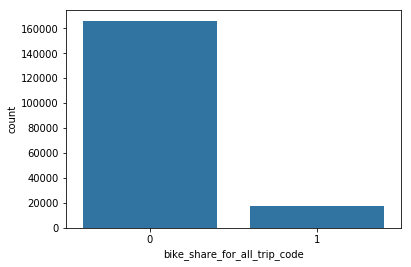

In [81]:
base_color=sb.color_palette()[0]
sb.countplot(data=fordgobike, x='bike_share_for_all_trip_code', color=base_color);

> Only very few users use bike share for all their trips

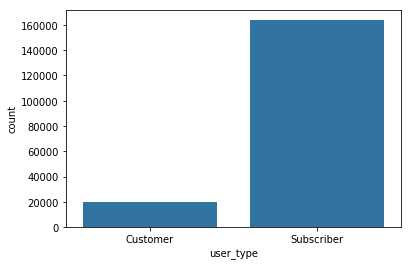

In [82]:
sb.countplot(data=fordgobike, x='user_type', color=base_color);

> We see clearly that over 160,000 subscribers make a huge % of user_types for the bike sharing system

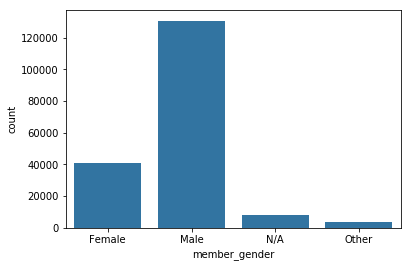

In [83]:
sb.countplot(data=fordgobike, x='member_gender', color=base_color);

> Even though we have 8,265 null values for this variable, it is still safe to deduce that we had more male using the bike sharing system during the period

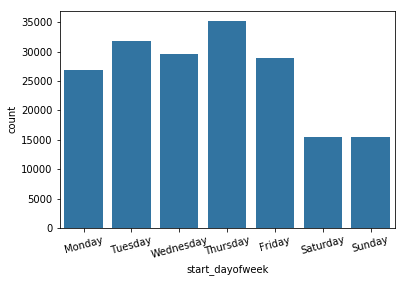

In [84]:
sb.countplot(data=fordgobike, x='start_dayofweek', color=base_color)
plt.xticks(rotation=15);

> Most bike rides start on Thursday. Generally, the bike rides happen more during the weekdays than weekends

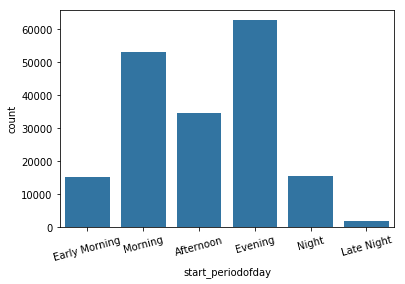

In [85]:
sb.countplot(data=fordgobike, x='start_periodofday', color=base_color)
plt.xticks(rotation=15);

> It can be deduced that most user_types would typically start their rides in the mornings or evenings.

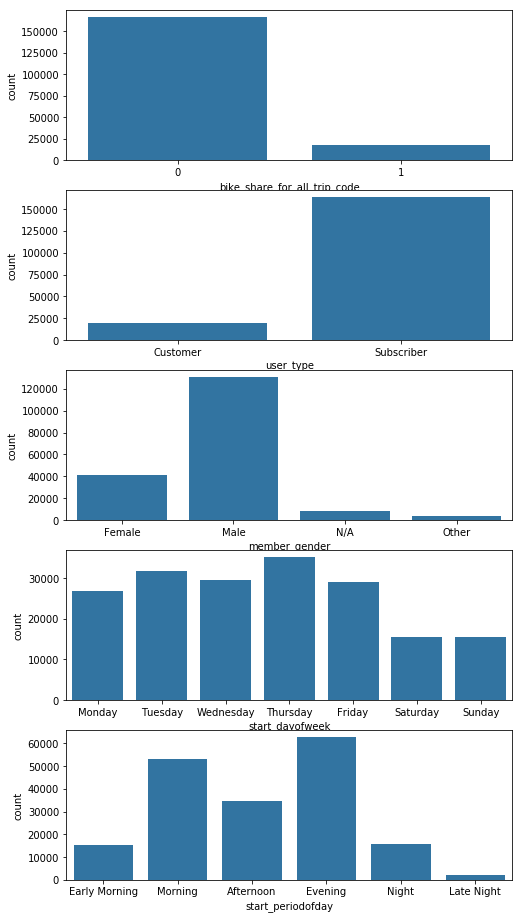

In [86]:
# plotting all four categorical variables together to get an idea of each of their distribution.

fig, ax = plt.subplots(nrows=5, figsize = [8,16])

sb.countplot(data=fordgobike, x='bike_share_for_all_trip_code', color=base_color, ax = ax[0])
sb.countplot(data = fordgobike, x = 'user_type', color = base_color, ax = ax[1])
sb.countplot(data = fordgobike, x = 'member_gender', color = base_color, ax = ax[2])
sb.countplot(data = fordgobike, x = 'start_dayofweek', color = base_color, ax = ax[3])
sb.countplot(data = fordgobike, x = 'start_periodofday', color = base_color, ax = ax[4])

plt.show();

> In summary, we see how most of the user_type do not use bike share for all trip. Most user_type are subscribers. User_type are majorly male. A good number of rides starting during the day of the week rather than on a weekend. Rides would typically start either in the morning or evening.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> At first, the variable of interest which is duration looked skewed to the right with large range of values. So the data was transformed using log transform to get a better view of the distribution. Under the transformation, the data looked unimodal with its peak between 500 and 1000.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the 'duration_sec' variable, duration above 30,000 seconds were the outliers in the histogram plotted which had 151 rows. There were no need for any operations as the duration column largely matched the difference between the end_time and start_time columns.

## Bivariate Exploration

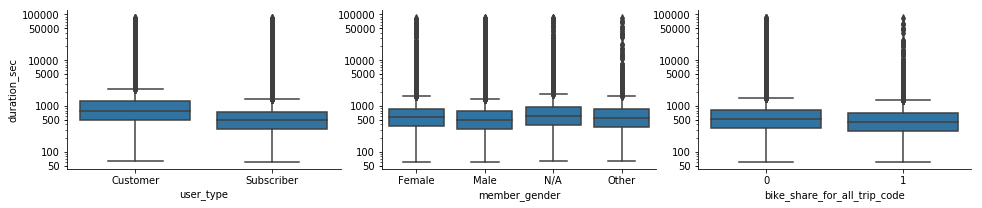

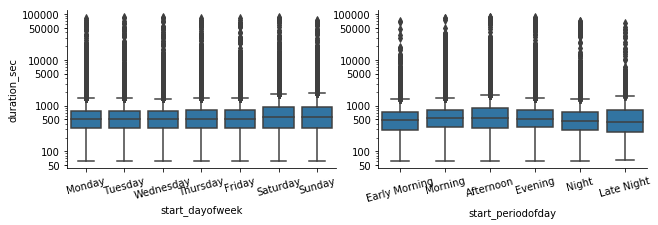

In [87]:
#Use boxplot to identify relationship between the variable of interest 'duration_sec' and each of the categorical variables
plt.figure(figsize = [20, 20])
categoric_vars1=['user_type', 'member_gender', 'bike_share_for_all_trip_code']
def boxgrid1(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = fordgobike, y_vars = 'duration_sec', x_vars = categoric_vars1,
                size = 3, aspect = 1.5)
plt.yscale('log')
ticks = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
plt.yticks(ticks, ticks)

g.map(boxgrid1)
plt.show();


categoric_vars2=['start_dayofweek', 'start_periodofday']
def boxgrid2(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=15)

g = sb.PairGrid(data = fordgobike, y_vars = 'duration_sec', x_vars = categoric_vars2,
                size = 3, aspect = 1.5)
plt.yscale('log')
ticks = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]
plt.yticks(ticks, ticks)

g.map(boxgrid2)
plt.show();

In [88]:
fordgobike.describe(include=['category'])

,user_type,member_gender,bike_share_for_all_trip,start_dayofweek,start_periodofday
count,183412,183412,183412,183412,183412
unique,2,4,2,7,6
top,Subscriber,Male,No,Thursday,Evening
freq,163544,130651,166053,35197,62741


> Even though subscribers have a larger base as a user_type, the boxplot shows customers are spending more time on bike rides. Generally on the duration on bike rides: Females are doing better than males, Weekends tend to have bike rides with higher duration, afternoons as well. 

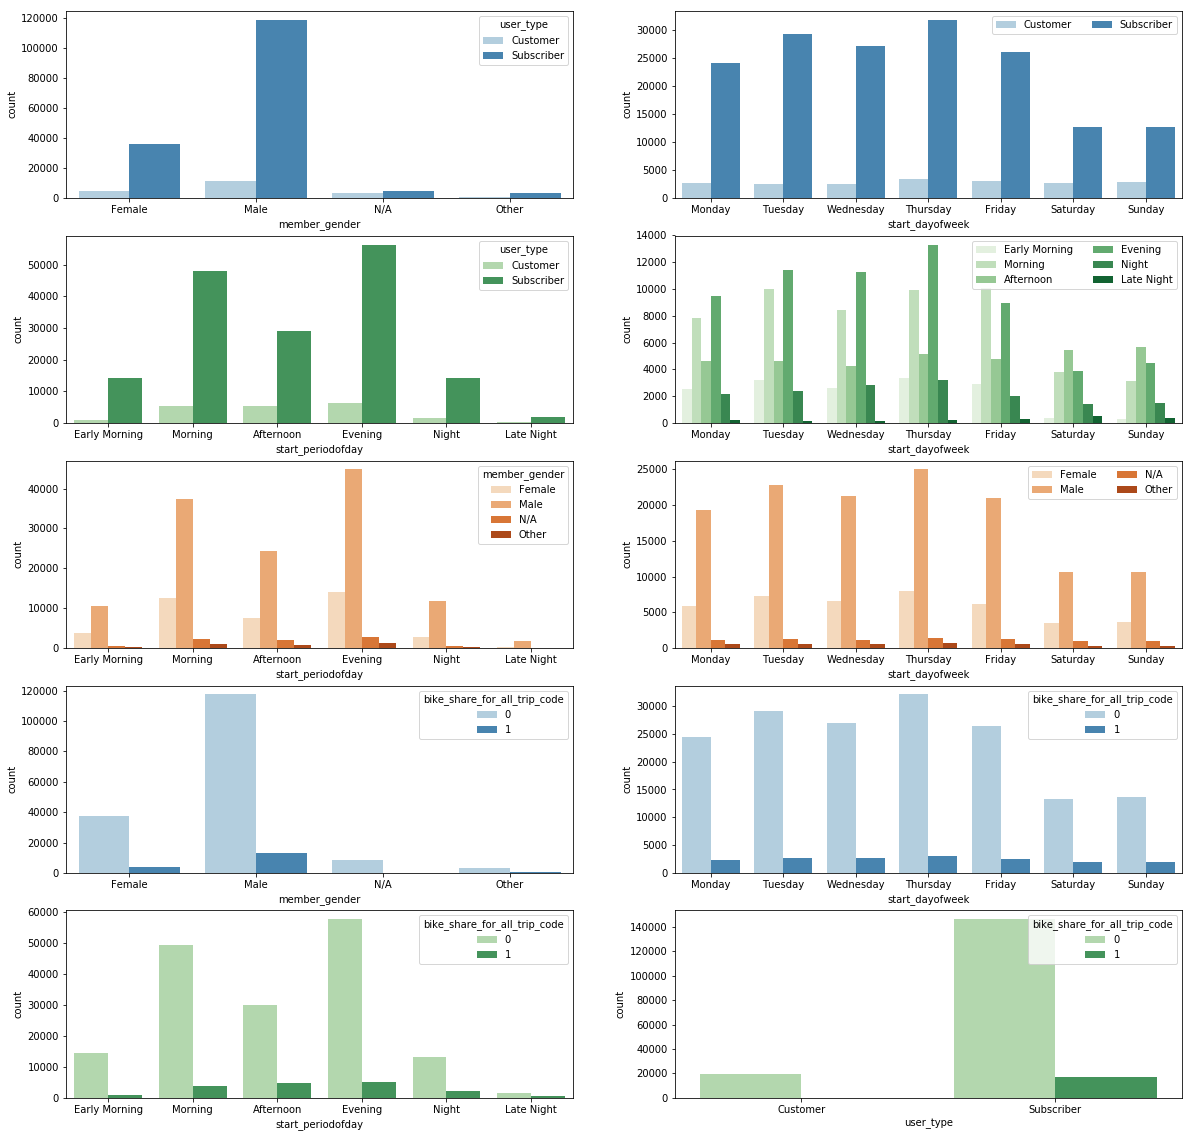

In [89]:
#Finding out the relationship between categorical variables
plt.figure(figsize = [20, 20])

# subplot 1: member_gender vs user_type
plt.subplot(5, 2, 1)
sb.countplot(data = fordgobike, x = 'member_gender', hue = 'user_type', palette = 'Blues')


# subplot 2: start_dayofweek vs user_type
ax=plt.subplot(5, 2, 2)
sb.countplot(data = fordgobike, x = 'start_dayofweek', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: start_periodofday vs user_type
plt.subplot(5, 2, 3)
sb.countplot(data = fordgobike, x = 'start_periodofday', hue = 'user_type', palette = 'Greens')

# subplot 4: start_dayofweek vs start_periodofday
ax=plt.subplot(5, 2, 4)
sb.countplot(data = fordgobike, x = 'start_dayofweek', hue = 'start_periodofday', palette = 'Greens')
ax.legend(loc=1, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 5: start_periodofday vs member_gender
plt.subplot(5, 2, 5)
sb.countplot(data = fordgobike, x = 'start_periodofday', hue = 'member_gender', palette = 'Oranges')

# subplot 6: start_dayofweek vs member_gender
ax=plt.subplot(5, 2, 6)
sb.countplot(data = fordgobike, x = 'start_dayofweek', hue = 'member_gender', palette = 'Oranges')
ax.legend(ncol = 2)

# subplot 7: member_gender vs bike_share_for_all_trip_code
plt.subplot(5, 2, 7)
sb.countplot(data = fordgobike, x = 'member_gender', hue = 'bike_share_for_all_trip_code', palette = 'Blues')

# subplot 8: start_dayofweek vs bike_share_for_all_trip_code
plt.subplot(5, 2, 8)
sb.countplot(data = fordgobike, x = 'start_dayofweek', hue = 'bike_share_for_all_trip_code', palette = 'Blues')

# subplot 9: start_periodofday vs bike_share_for_all_trip_code
plt.subplot(5, 2, 9)
sb.countplot(data = fordgobike, x = 'start_periodofday', hue = 'bike_share_for_all_trip_code', palette = 'Greens')

# subplot 10: user_type vs bike_share_for_all_trip_code
plt.subplot(5, 2, 10)
sb.countplot(data = fordgobike, x = 'user_type', hue = 'bike_share_for_all_trip_code', palette = 'Greens')

plt.show()

> Generally, during the weekdays especially between Mondays and Thursdays most rides start out in the Evening. Even though ride durations are higher during the weekend, the most frequency of rides happen on Thursdays. 

> We can deduce that on Thursday evening, male subscribers with no bike share for all trip contribute largely to the number of bike share rides recorded. This corroborates the earlier shown descriptive stats for the categorical variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was an interesting relationship observed between duration_sec and the categorical features. For all of user_type, member_gender, start_dayofweek and start_periodofweek, lower duration time was associated with subscribers, male, weekdays and night-time. Overlaying at least 2 of these features alongside the variable duration_sec will be explored to further understand what features will have an effect on the duration of time spent on a ride.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that there is an interesting relationship between the day of week and period of day that have an effect on the frequency of rides taken. The Evenings between Monday and Thursday have the most rides during that day while on Saturday and Sunday, we see the afternoon having the most rides which corroborates the earlier deductions from the boxplots.

>Also a relationship between the user_type and period of day. More rides were taken by Subscibers in the Mornings and Evenings while Customers in the Afternoon and Evenings

>Day of week and user_type. Thursday is the day where most of the rides were taken by Subscribers and Customers

## Multivariate Exploration

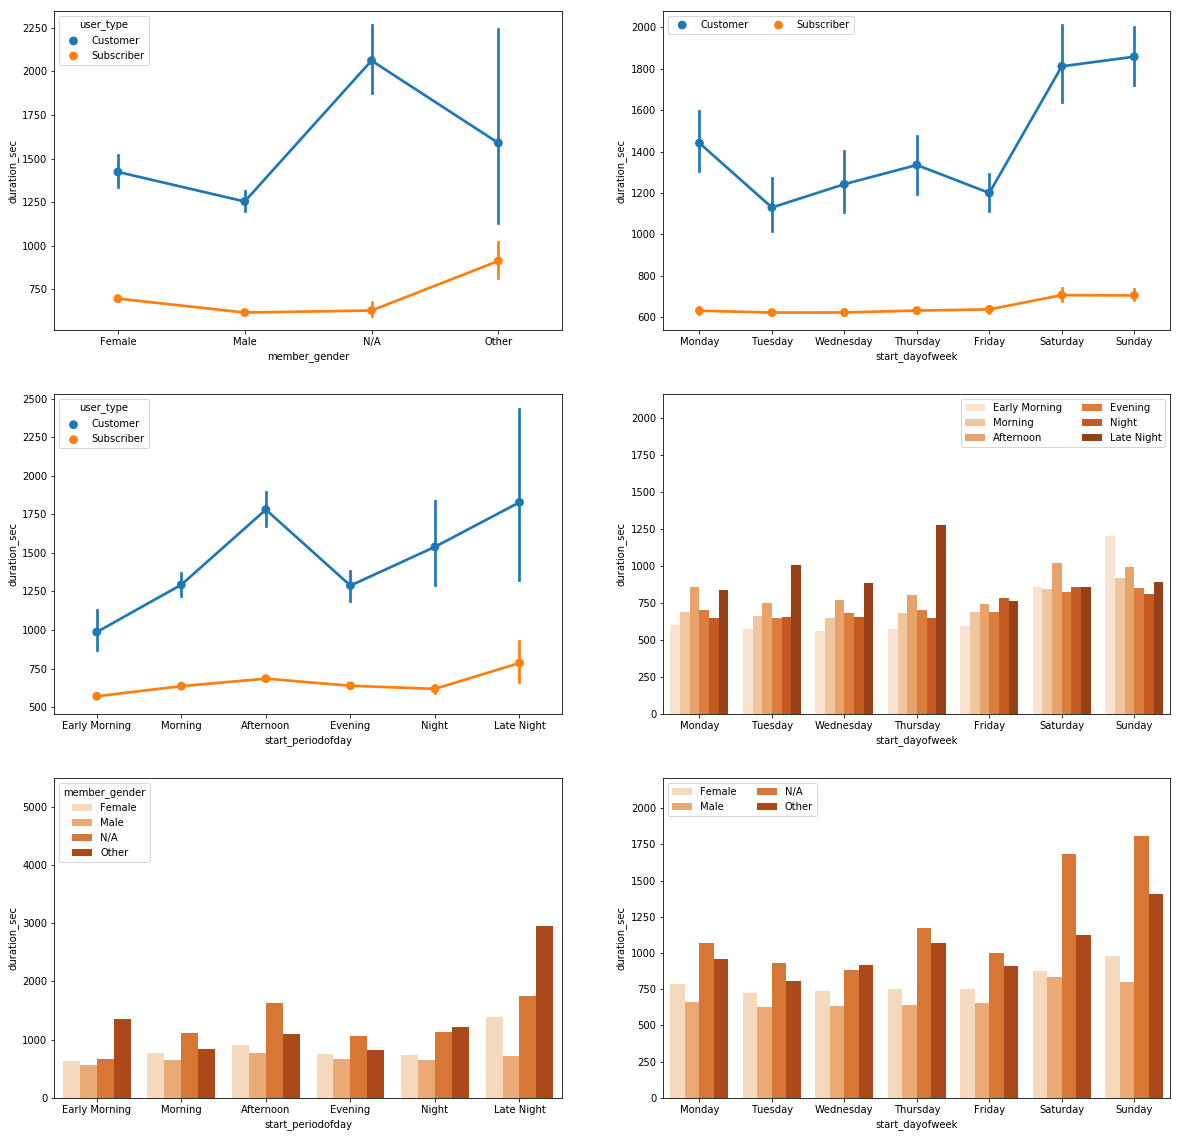

In [90]:
#Comparing 2 categorical data alongside numeric variable- duration_sec
plt.figure(figsize = [20, 20])

# subplot 1
plt.subplot(3, 2, 1)
sb.pointplot(data=fordgobike, x='member_gender', y='duration_sec', hue = 'user_type');


# subplot 2: 
ax=plt.subplot(3, 2, 2)
sb.pointplot(data = fordgobike, x = 'start_dayofweek', y='duration_sec', hue = 'user_type')
ax.legend(ncol = 2) 

# subplot 3: 
plt.subplot(3, 2, 3)
sb.pointplot(data = fordgobike, x = 'start_periodofday', y='duration_sec', hue = 'user_type')

# subplot 4: 
ax=plt.subplot(3, 2, 4)
sb.barplot(data = fordgobike, x = 'start_dayofweek', y='duration_sec', hue = 'start_periodofday', palette = 'Oranges', errwidth=0)
ax.legend(loc=1, ncol = 2) 

# subplot 5:
plt.subplot(3, 2, 5)
sb.barplot(data = fordgobike, x = 'start_periodofday', y='duration_sec', hue = 'member_gender', palette = 'Oranges', errwidth=0)

# subplot 6: 
ax=plt.subplot(3, 2, 6)
sb.barplot(data = fordgobike, x = 'start_dayofweek', y='duration_sec', hue = 'member_gender', palette = 'Oranges', errwidth=0)
ax.legend(ncol = 2)

plt.show();

> In extending the investigation by carrying out multivariate visualizations of 2 categorical variables against duration_sec, I noticed there is a high interaction level between start_periodofday and member_gender, start_dayofweek and member_gender, start_dayofweek and startperiodofday that have an effect on the amount of time spent per ride.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration here showed that there are interactions between start_periodofday and member_gender, start_dayofweek and member_gender, start_periodofday and start_dayofweek that have an effect on the duration of rides. We see more females than males use more time on rides typically during the weekends. Late Nights(followed by afternoon) had the most duration.

### Were there any interesting or surprising interactions between features?

> I think it was surpising that on an average, customers spent more time than subscribers on rides. It would normally be expected that subscribers would have some sort of incentive over customers to encourage them to spend more time on rides.

## Conclusions
>1. On Frequency of rides: The most trips taken in terms of day of week and time is in the evenings of Thursdays

>2. On Duration_secs:  Customers spent more time than subscribers on rides on an average. 

>3. On Duration_secs: There is a high interaction level between start_periodofday and member_gender, start_dayofweek and member_gender, start_dayofweek and startperiodofday that have an effect on the amount of time spent per ride.